In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from dredFISH.Utils.__init__plots import *

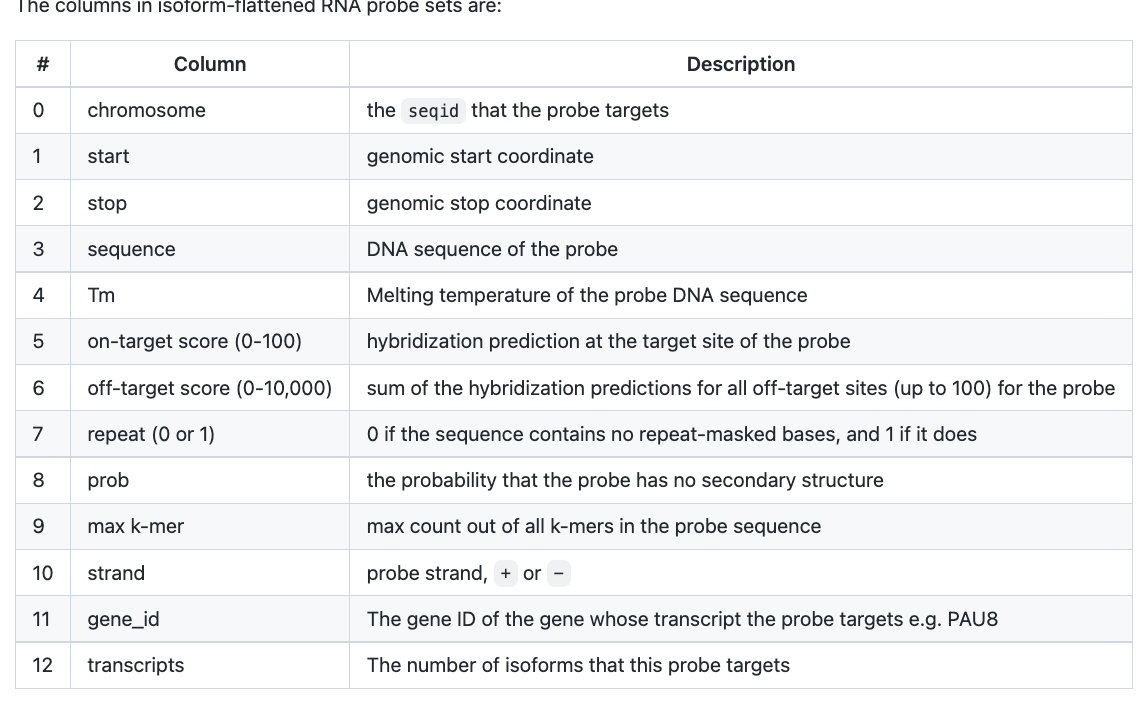

In [2]:
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)
    

In [3]:
ddir = "/bigstore/GeneralStorage/fangming/projects/dredfish/packages/PaintSHOP_pipeline/test3_chr1_fixl/" 
f = os.path.join(ddir, "pipeline_output/03_output_files/03_rna_probes_iso/mm10_iso_newBalance.tsv")
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]


df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214521,3214550,TGACCAAGGACACCGAAAACAGAAAGCGGG,42.59,99.052,0.0,0,0.502,0,+,Xkr4,1,30,0.533333
1,chr1,3214634,3214663,AGCTGATGGAGTGGTAAGCCCTCAAGCAGT,42.83,98.987,0.0,0,0.279,0,+,Xkr4,1,30,0.533333
2,chr1,3214882,3214911,ATTTGGCACTCGAAAGATGTGGCACGTGGT,42.67,100.000,0.0,0,0.192,0,+,Xkr4,1,30,0.500000
3,chr1,3214924,3214953,ACCTGCTGACCCATGTCATTCTGCACCTGG,43.76,100.000,0.0,0,0.277,0,+,Xkr4,1,30,0.566667
4,chr1,3214993,3215022,TAGTCCCTGTTCCTCTCCTGTGGCTCTGTG,42.13,99.877,0.0,0,0.525,0,+,Xkr4,1,30,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52752,chr1,195163226,195163255,TCCCCACATTTCATTTGCCTGGCACCAGAC,42.88,98.869,0.0,0,0.279,2,+,Cr2,2,30,0.533333
52753,chr1,195163405,195163434,TAGGAGGAGCTTTATCCCAGGTGGCATGCA,42.60,96.557,0.0,1,0.281,0,+,Cr2,2,30,0.533333
52754,chr1,195176579,195176608,AAGAAAACCCAGAGCGAACCCAAGGATCCC,42.11,97.054,0.0,0,0.309,0,+,Cr2,2,30,0.533333
52755,chr1,195176609,195176638,ATGTGTGCAGCAGTCCAATGGCAGGTTGCG,45.07,99.682,0.0,0,0.272,0,+,Cr2,2,30,0.566667


In [4]:
# df[df['gname'] == 'Xkr4']
(df['len'] != 30).sum(), (df['repeat'] == 1).sum()

(0, 2999)

In [5]:
cond1 = df['len']==30
cond2 = df['repeat']==0
cond = np.logical_and(cond1, cond2)

df2 = df[cond]
print(df.shape, df2.shape)

cond3 = df2['offscore']<50
df3 =  df2[cond3].copy()
print(df3.shape)

cond4 = df3['onscore']>98
df4 =  df3[cond4].copy()
print(df4.shape)

(52757, 15) (49758, 15)
(48018, 15)
(40101, 15)


<AxesSubplot:xlabel='prob', ylabel='Count'>

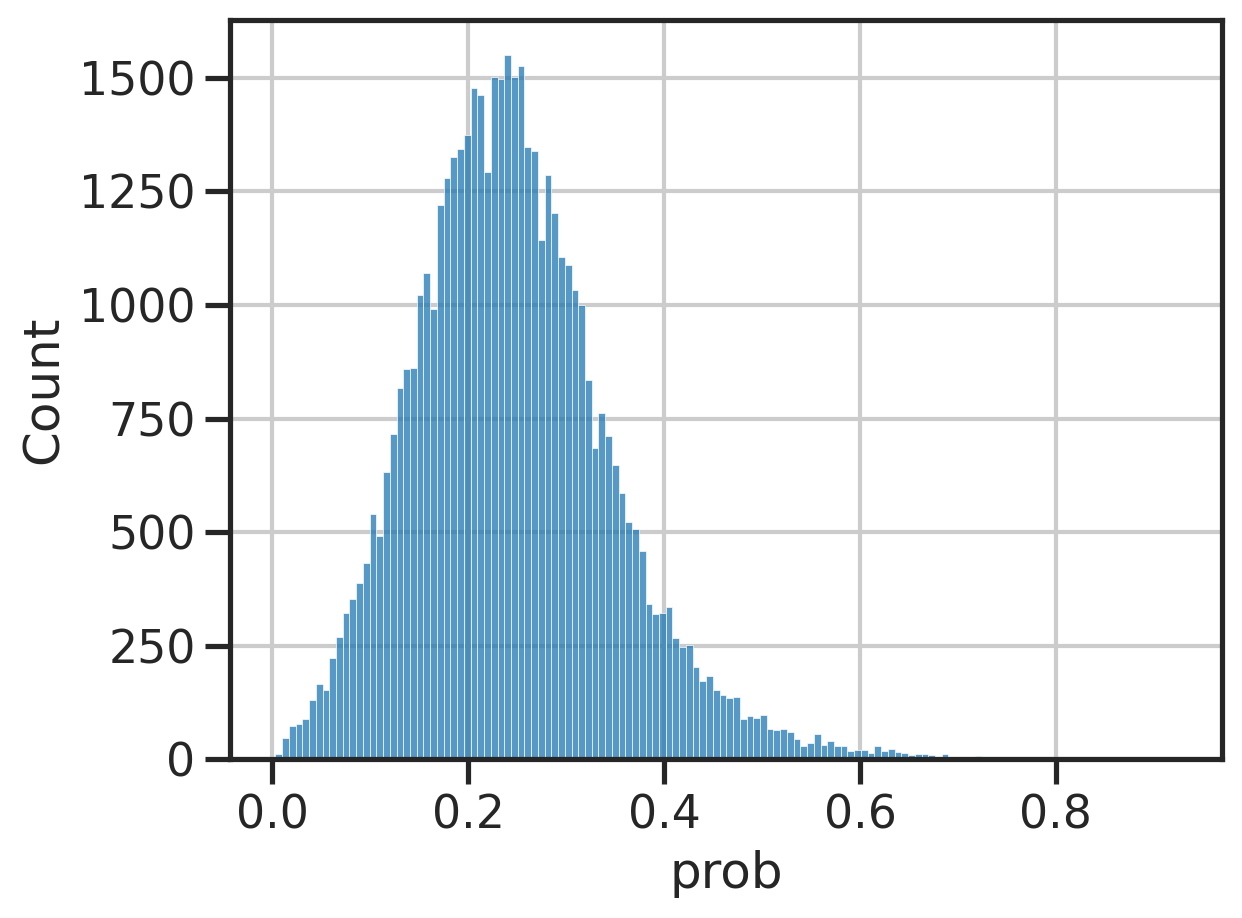

In [6]:
sns.histplot(df2['prob'])

Text(0, 0.5, 'max k-mer')

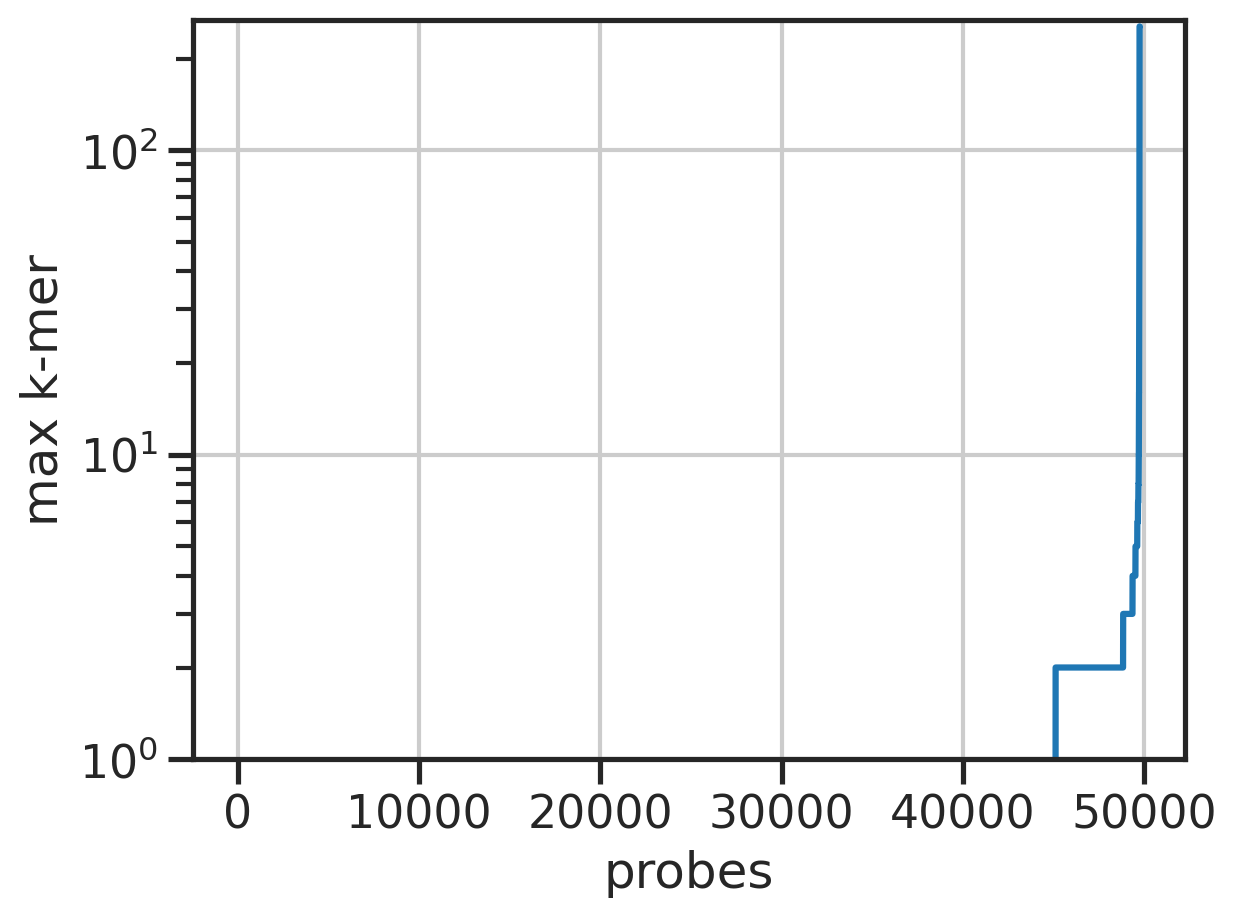

In [7]:
plt.plot(np.sort(df2['maxkmer']))
plt.ylim([1, None])
plt.yscale('log')
plt.xlabel('probes')
plt.ylabel('max k-mer')

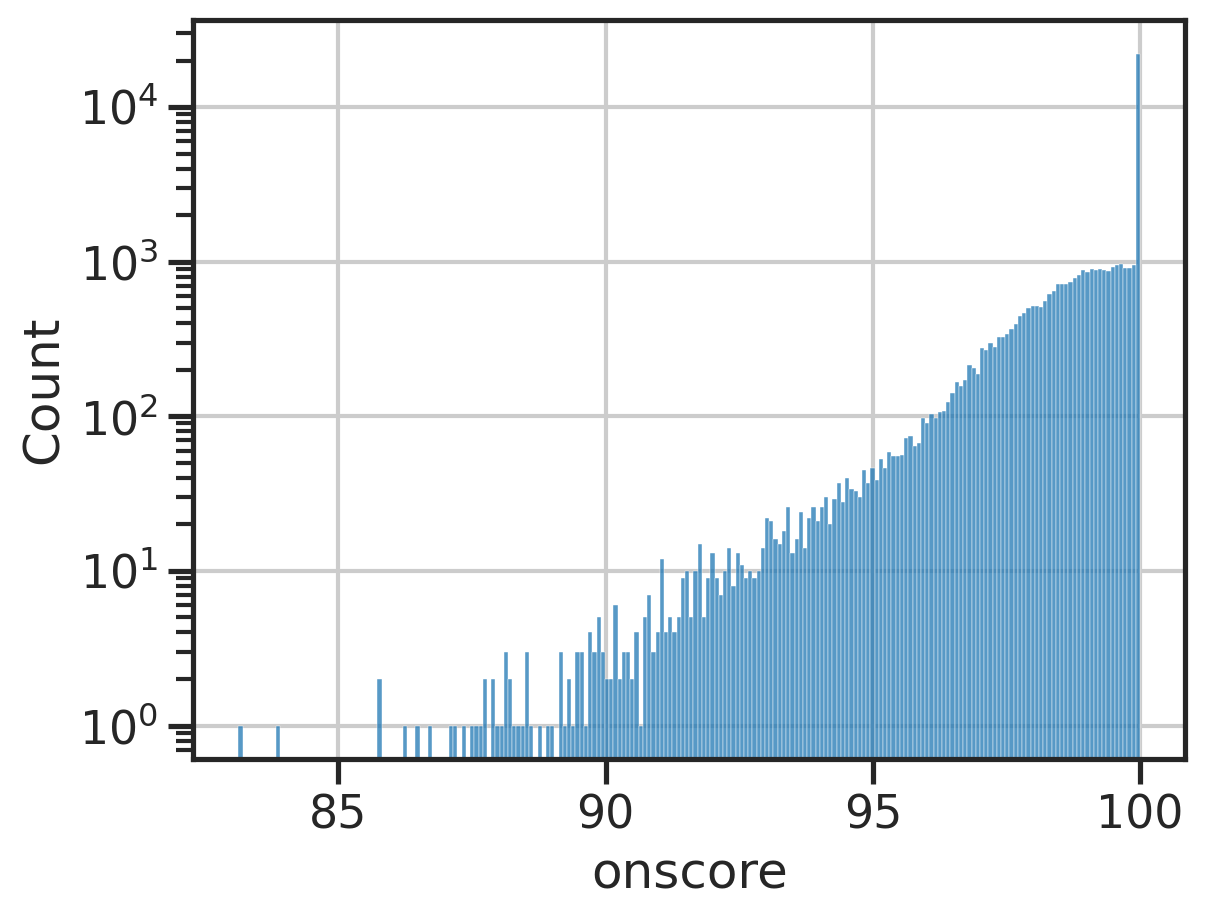

In [8]:
sns.histplot(df2['onscore'])
plt.yscale('log')

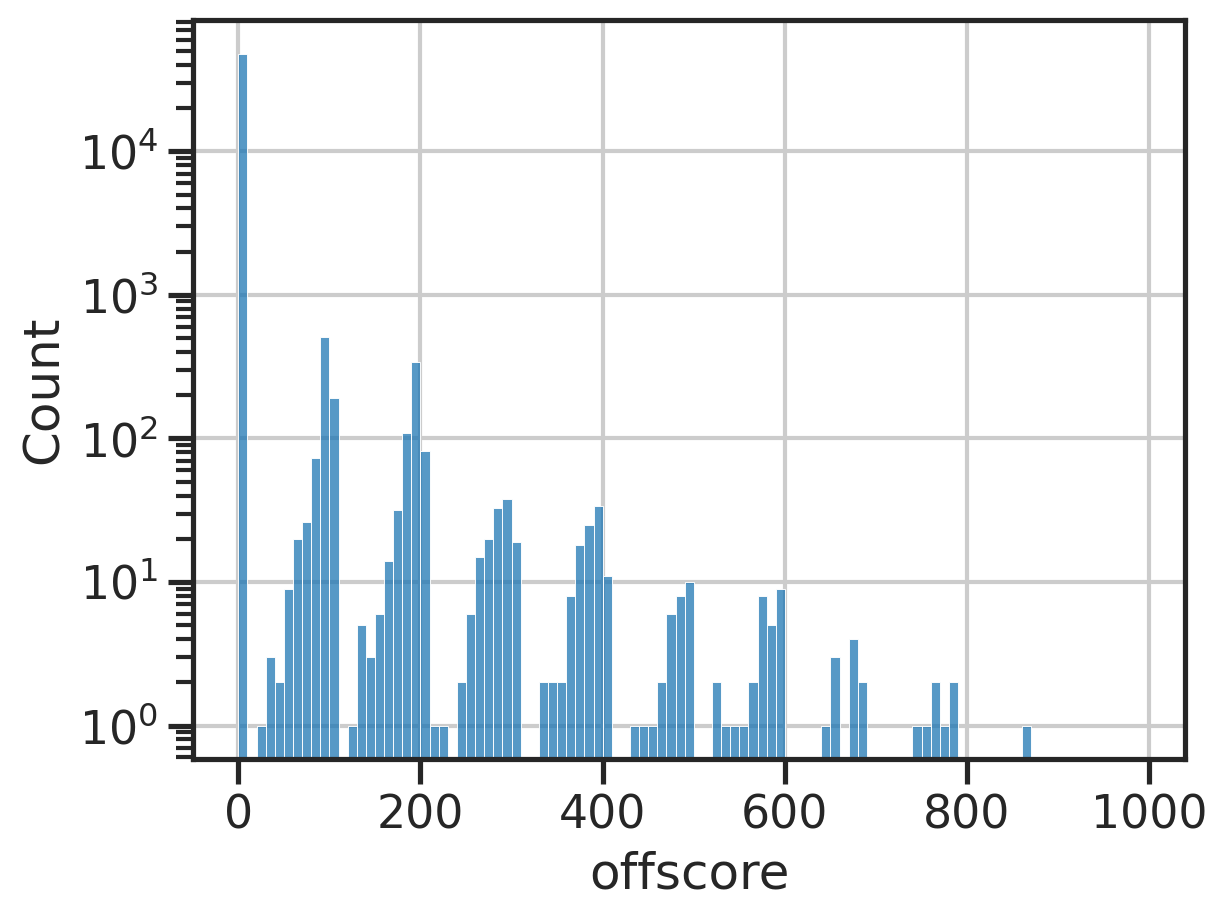

In [9]:
sns.histplot(df2['offscore'], bins=np.arange(0, 1000, 10))
plt.yscale('log')

<AxesSubplot:xlabel='tm', ylabel='gc'>

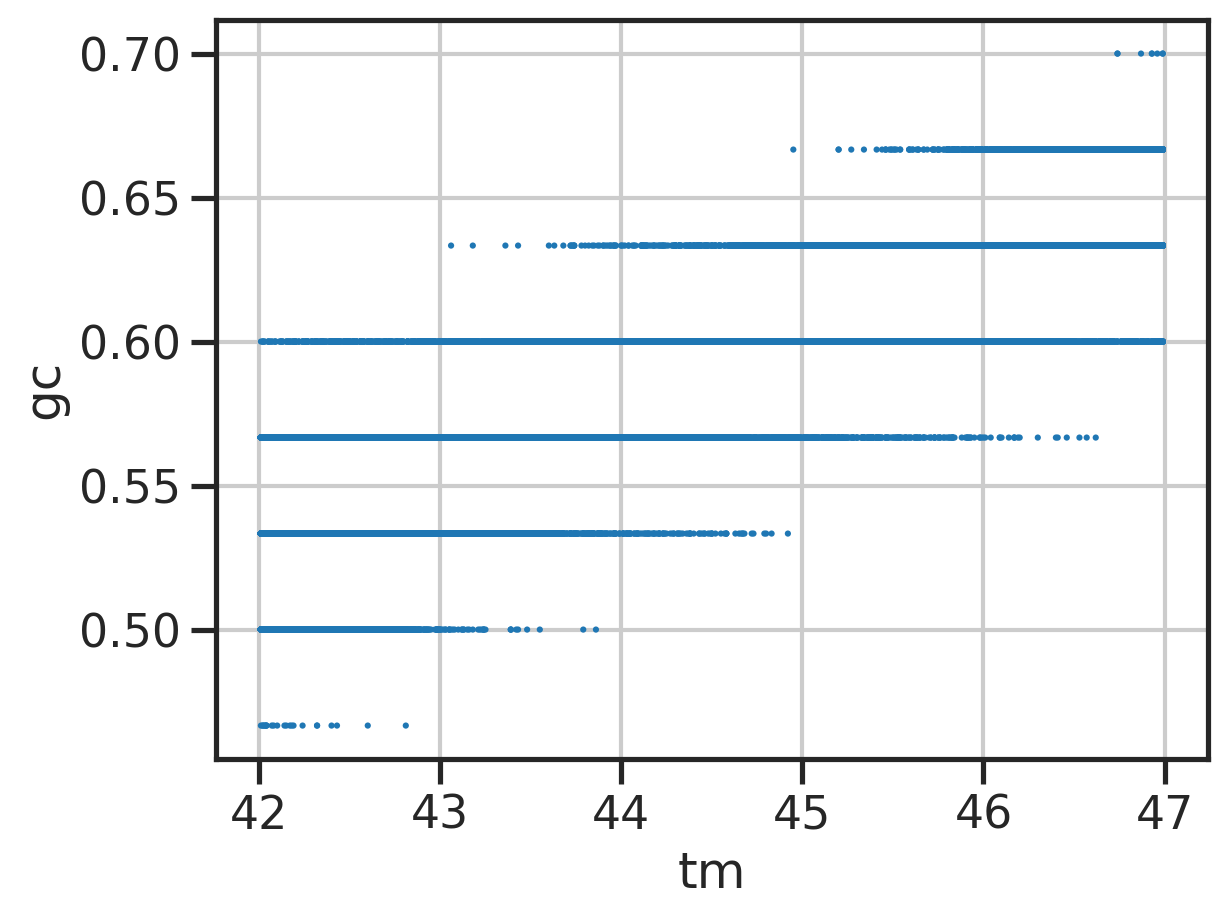

In [10]:
sns.scatterplot(data=df2, x='tm', y='gc', edgecolor='none', s=5) 

<AxesSubplot:xlabel='offscore', ylabel='maxkmer'>

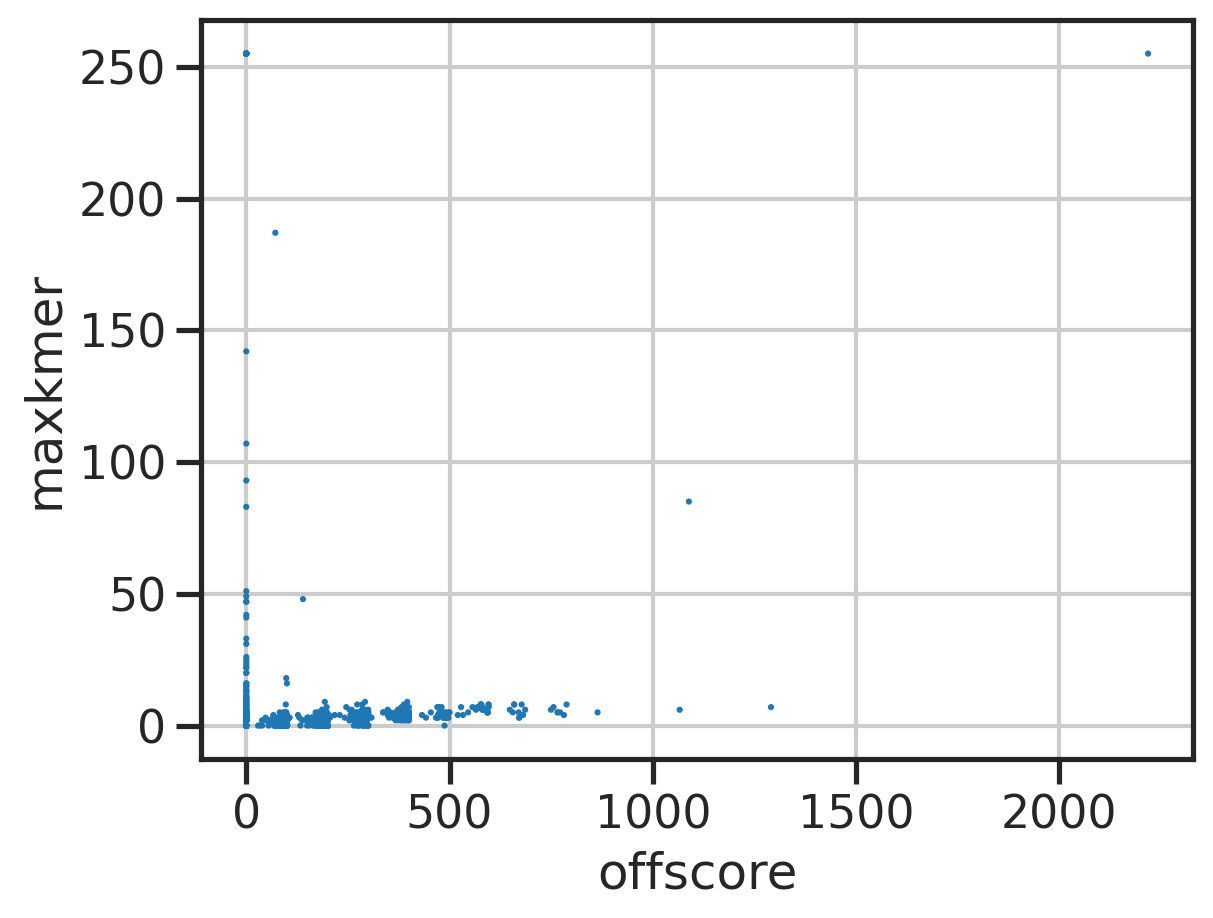

In [11]:
sns.scatterplot(data=df2, x='offscore', y='maxkmer', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='offscore'>

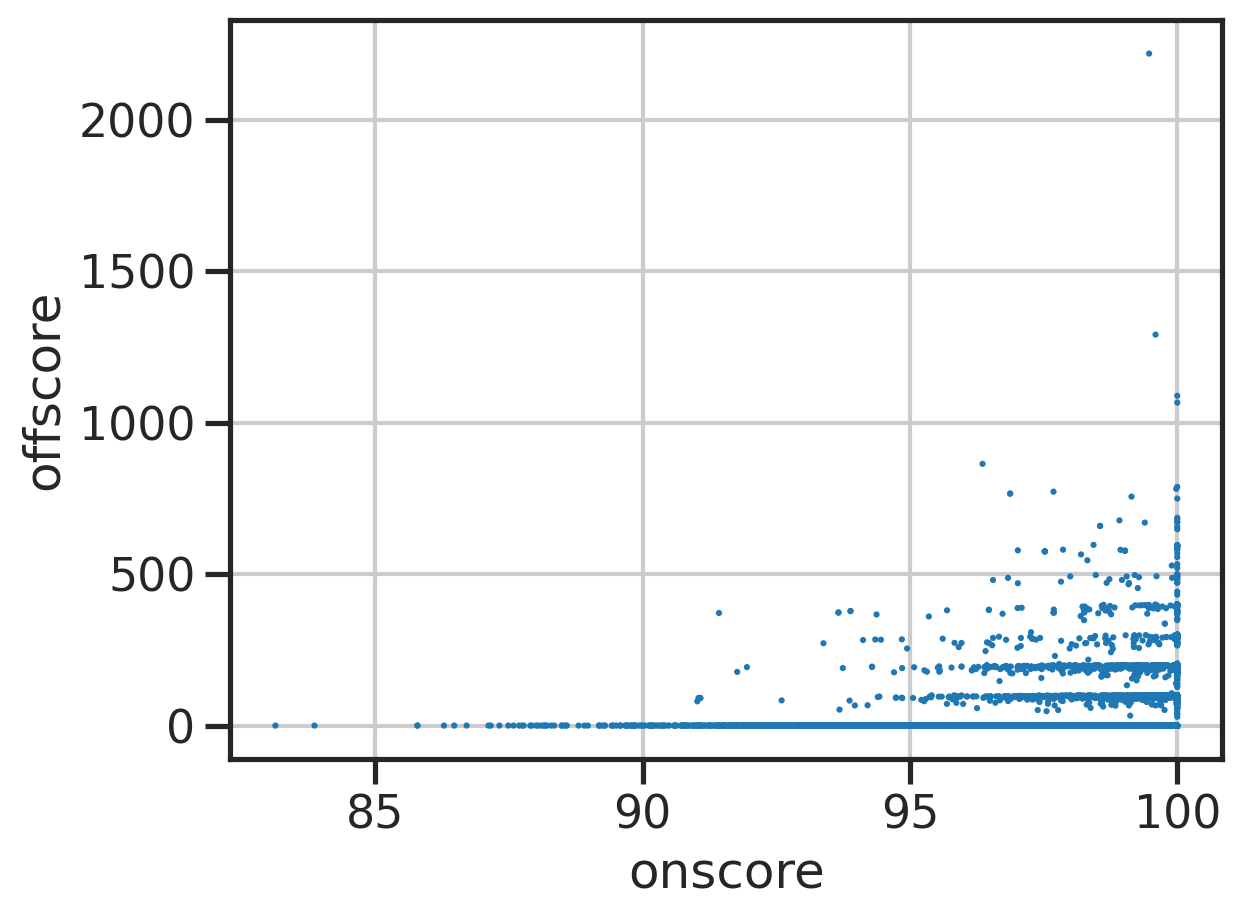

In [12]:
sns.scatterplot(data=df2, x='onscore', y='offscore', edgecolor='none', s=5) 

<AxesSubplot:xlabel='onscore', ylabel='prob'>

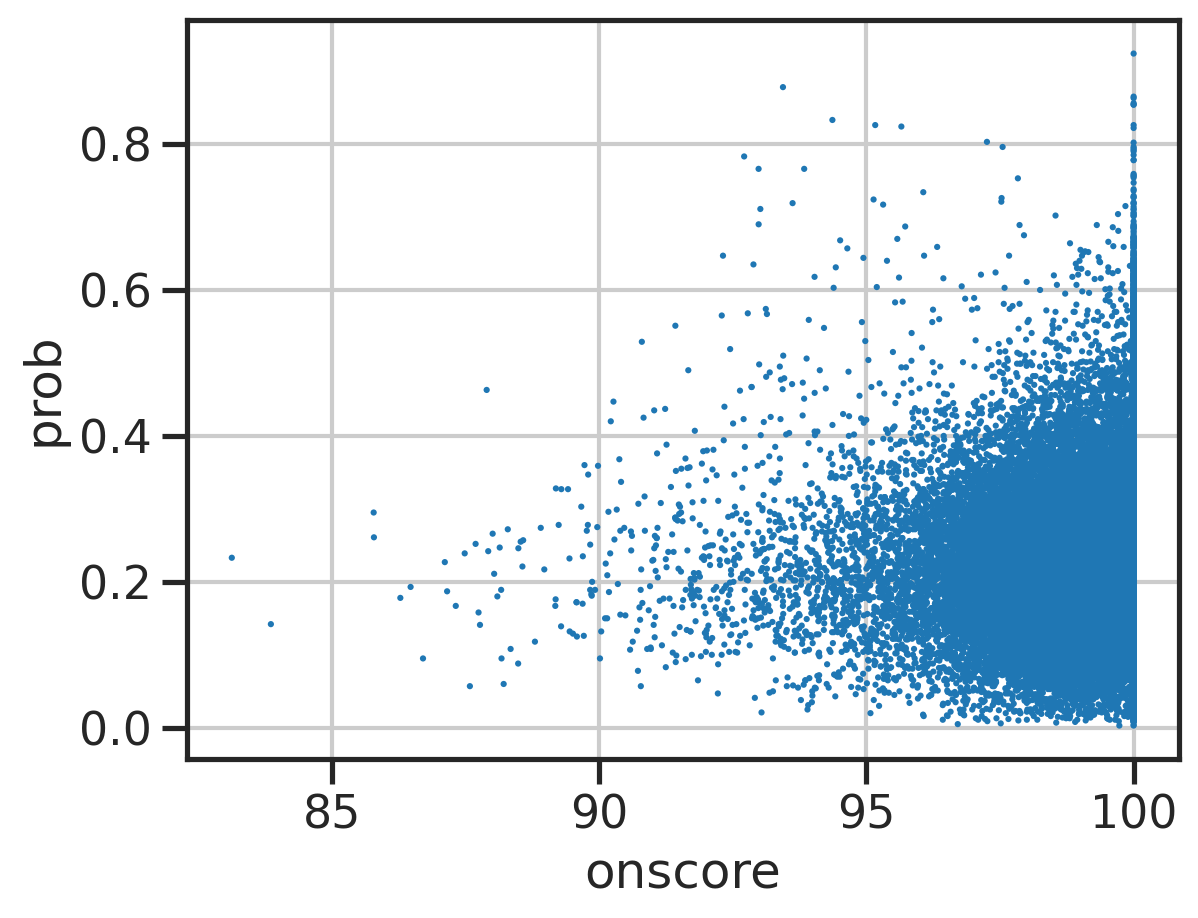

In [13]:
sns.scatterplot(data=df2, x='onscore', y='prob', edgecolor='none', s=5) 

In [14]:
gene_cnstrnts = df2.groupby('gname').size()
gene_cnstrnts_v3 = df3.groupby('gname').size()# .reindex(gene_constraints.index)
gene_cnstrnts_v4 = df4.groupby('gname').size()# .reindex(gene_constraints.index)

# cnstrnts = pd.DataFrame(gene_cnstrnts)
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts = cnstrnts.join(gene_cnstrnts_v3.to_frame())
# cnstrnts

Text(0, 0.5, 'Num. probes')

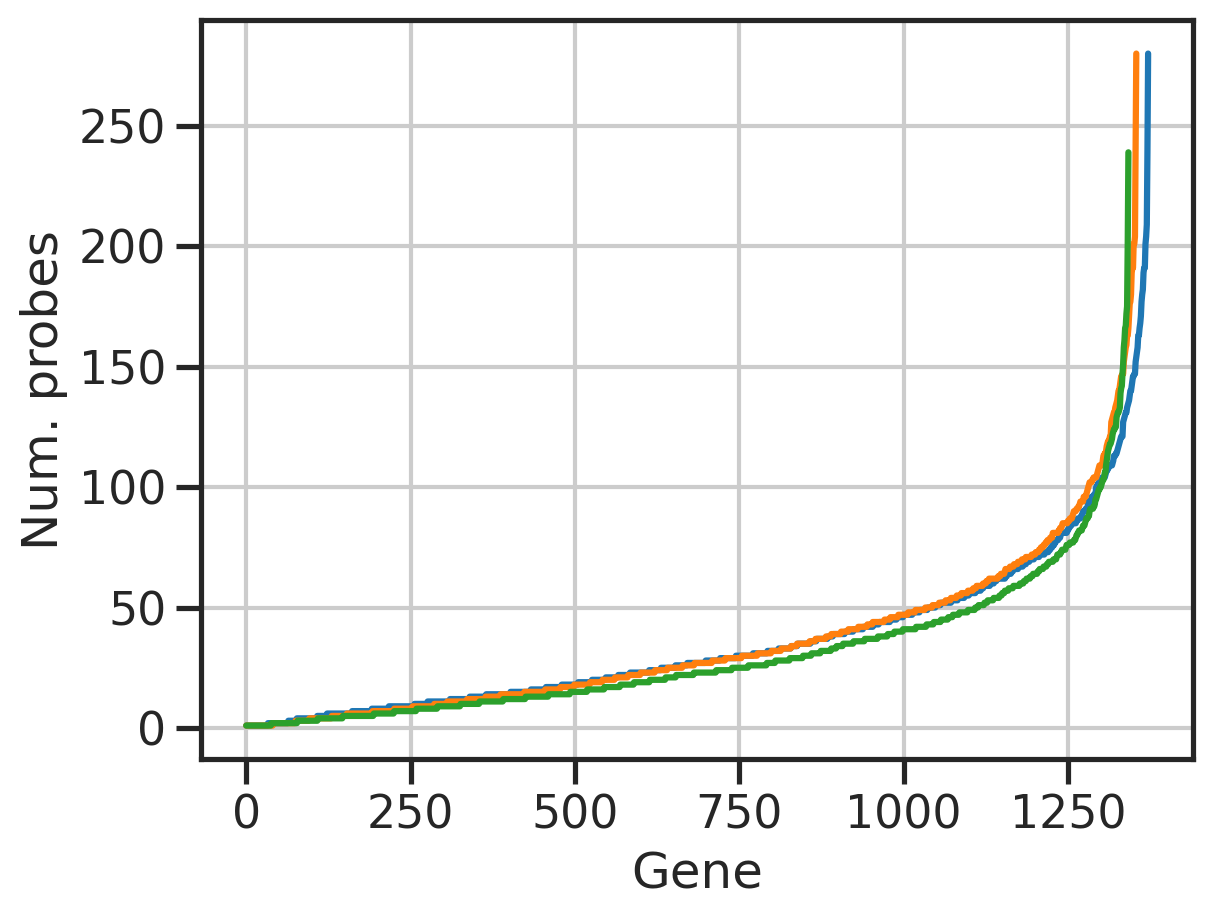

In [15]:
plt.plot(np.sort(gene_cnstrnts))
plt.plot(np.sort(gene_cnstrnts_v3))
plt.plot(np.sort(gene_cnstrnts_v4))
plt.xlabel('Gene')
plt.ylabel('Num. probes')

In [16]:
df2[df2['maxkmer'] > 200]

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
3609,chr1,34445685,34445714,ATACACACACACACACCACACGCAAAGCCA,42.71,100.000,0.000,0,0.754,255,-,Imp4,1,30,0.500000
5025,chr1,36699882,36699911,TGTGTGTCTGTGTGTGTGTTGAGCACAGGG,42.46,97.499,0.000,0,0.366,255,+,Actr1b,1,30,0.533333
6445,chr1,39988999,39989028,CTGCTCAGGCACTTCCTCCTCCTCCTCCTC,44.07,97.542,0.000,0,0.283,255,-,Map4k4,4,30,0.633333
6755,chr1,40681910,40681939,CAGCAGCAGCAGCAGCAGCCAAGACAGTGG,46.60,100.000,0.000,0,0.117,255,-,Slc9a2,1,30,0.633333
7083,chr1,43047835,43047864,TTAAAGGATTTGGTGGTGGTGGTGGTGGGG,42.35,92.727,0.000,0,0.385,255,+,Tgfbrap1,2,30,0.533333
18323,chr1,86345278,86345307,GGTCCTGAGTTCAAATCCCAGCCACCATGC,42.87,99.474,2218.669,0,0.482,255,+,Ncl,1,30,0.566667
18535,chr1,86605713,86605742,ACATCCCTCCATGGCCTCAACTGGCACTGC,45.50,98.562,0.000,0,0.232,255,-,Cops7b,3,30,0.600000
18983,chr1,87374047,87374076,CCCACCACTGTTCCTCCTCCTCCTCCTCGT,45.18,99.242,0.000,0,0.417,255,-,Gigyf2,2,30,0.633333
27834,chr1,131054538,131054567,ACACACACATGCACACACATGTGCTGCTCT,42.78,97.236,0.000,0,0.129,255,+,Mapkapk2,1,30,0.500000
28252,chr1,131662005,131662034,CAGGAGCAGCAGCAGCAGCAGCACAAGGAG,46.27,99.335,0.000,0,0.145,255,-,Ctse,1,30,0.633333


In [17]:
df2[df2['maxkmer'] == 5]

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
1257,chr1,13785712,13785741,TCAAGAGAGTAGGGAGGGCTTCCTAGGCCC,43.29,97.072,262.783,0,0.168,5,+,Gm5523,1,30,0.600000
1260,chr1,13785824,13785853,AACCGAGGGCCTCTCTCTTGCTCTCAATGT,42.57,100.000,0.000,0,0.300,5,+,Gm5523,1,30,0.533333
1263,chr1,13785914,13785943,TCCACCACCCTGTTGCTGTAGCCGTATTCA,42.90,100.000,655.745,0,0.350,5,+,Gm5523,1,30,0.533333
1264,chr1,13785971,13786000,AAGTTGTCATTGAGAGCAATGCCAGCCCCG,42.98,96.874,765.905,0,0.242,5,+,Gm5523,1,30,0.533333
1271,chr1,13786239,13786268,CCACAGCCTTGGCAGCACCAGTGGATGCAG,46.42,97.685,772.261,0,0.132,5,+,Gm5523,1,30,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51888,chr1,192513629,192513658,GAGTGGAAGGTAGTCCCTCAGGGACTGTCC,42.17,93.629,0.000,0,0.058,5,+,Hhat,1,30,0.600000
51890,chr1,192513689,192513718,CCTGGAGTGGAGGGTGGTCCCTCAGGGACT,46.68,94.457,283.370,0,0.070,5,+,Hhat,1,30,0.666667
51891,chr1,192513719,192513748,GTCCTGGAGTGGAGGGTGGTCCCTCAGGGA,46.65,94.122,282.367,0,0.098,5,+,Hhat,1,30,0.666667
51892,chr1,192513749,192513778,CTGTCCTGGAGTGGAGGGTGGTCCCTCAGG,45.61,95.612,286.835,0,0.121,5,+,Hhat,1,30,0.666667


In [18]:
df4

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214521,3214550,TGACCAAGGACACCGAAAACAGAAAGCGGG,42.59,99.052,0.0,0,0.502,0,+,Xkr4,1,30,0.533333
1,chr1,3214634,3214663,AGCTGATGGAGTGGTAAGCCCTCAAGCAGT,42.83,98.987,0.0,0,0.279,0,+,Xkr4,1,30,0.533333
2,chr1,3214882,3214911,ATTTGGCACTCGAAAGATGTGGCACGTGGT,42.67,100.000,0.0,0,0.192,0,+,Xkr4,1,30,0.500000
3,chr1,3214924,3214953,ACCTGCTGACCCATGTCATTCTGCACCTGG,43.76,100.000,0.0,0,0.277,0,+,Xkr4,1,30,0.566667
4,chr1,3214993,3215022,TAGTCCCTGTTCCTCTCCTGTGGCTCTGTG,42.13,99.877,0.0,0,0.525,0,+,Xkr4,1,30,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52750,chr1,195160872,195160901,ATGTCACAGACAACCCCGCAACAAACTGGT,42.47,99.382,0.0,0,0.298,0,+,Cr2,2,30,0.500000
52751,chr1,195160934,195160963,ATCGTTGGAAGTGATGGGCACTCCAGAGGG,43.19,99.464,0.0,0,0.143,0,+,Cr2,2,30,0.566667
52752,chr1,195163226,195163255,TCCCCACATTTCATTTGCCTGGCACCAGAC,42.88,98.869,0.0,0,0.279,2,+,Cr2,2,30,0.533333
52755,chr1,195176609,195176638,ATGTGTGCAGCAGTCCAATGGCAGGTTGCG,45.07,99.682,0.0,0,0.272,0,+,Cr2,2,30,0.566667


In [19]:
import Bio.SeqUtils.MeltingTemp as mt

In [20]:
df4.iloc[0]

chrom                                    chr1
start                                 3214521
end                                   3214550
seq            TGACCAAGGACACCGAAAACAGAAAGCGGG
tm                                      42.59
onscore                                99.052
offscore                                  0.0
repeat                                      0
prob                                    0.502
maxkmer                                     0
strand                                      +
gname                                    Xkr4
transcripts                                 1
len                                        30
gc                                   0.533333
Name: 0, dtype: object

In [21]:
seq = df4.iloc[0]['seq']
print(seq)

TGACCAAGGACACCGAAAACAGAAAGCGGG


In [22]:
# default matches
res = mt.Tm_NN(seq, Na=390, dnac1=25, dnac2=25)
print(res)
res = mt.chem_correction(res, fmd=50)
res

75.08909307114425


42.58909307114425

In [23]:
# our settings 
# fmd > na > dnac1, dnac2
res = mt.Tm_NN(seq, Na=300, dnac1=2, dnac2=0.002)
print(res)
res = mt.chem_correction(res, fmd=30)
res

71.86133032196187


52.36133032196187

In [24]:
# our settings 
# fmd > na > dnac1, dnac2
res = mt.Tm_NN(seq, Na=300, dnac1=2, dnac2=2)
print(res)
res = mt.chem_correction(res, fmd=30)
res

71.17951259854061


51.67951259854061

In [25]:
def recalc_tm(seq, fmd=30, Na=300, dnac1=2, dnac2=2):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    

In [26]:
df4['newtm'] = df4['seq'].apply(lambda x: recalc_tm(x))
df4['newtm2'] = df4['seq'].apply(lambda x: recalc_tm(x, dnac2=0.001))
df4

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,newtm,newtm2
0,chr1,3214521,3214550,TGACCAAGGACACCGAAAACAGAAAGCGGG,42.59,99.052,0.0,0,0.502,0,+,Xkr4,1,30,0.533333,51.679513,52.361577
1,chr1,3214634,3214663,AGCTGATGGAGTGGTAAGCCCTCAAGCAGT,42.83,98.987,0.0,0,0.279,0,+,Xkr4,1,30,0.533333,51.814019,52.513870
2,chr1,3214882,3214911,ATTTGGCACTCGAAAGATGTGGCACGTGGT,42.67,100.000,0.0,0,0.192,0,+,Xkr4,1,30,0.500000,51.748030,52.431509
3,chr1,3214924,3214953,ACCTGCTGACCCATGTCATTCTGCACCTGG,43.76,100.000,0.0,0,0.277,0,+,Xkr4,1,30,0.566667,52.772928,53.467755
4,chr1,3214993,3215022,TAGTCCCTGTTCCTCTCCTGTGGCTCTGTG,42.13,99.877,0.0,0,0.525,0,+,Xkr4,1,30,0.566667,51.141965,51.838190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52750,chr1,195160872,195160901,ATGTCACAGACAACCCCGCAACAAACTGGT,42.47,99.382,0.0,0,0.298,0,+,Cr2,2,30,0.500000,51.518352,52.208136
52751,chr1,195160934,195160963,ATCGTTGGAAGTGATGGGCACTCCAGAGGG,43.19,99.464,0.0,0,0.143,0,+,Cr2,2,30,0.566667,52.209858,52.904771
52752,chr1,195163226,195163255,TCCCCACATTTCATTTGCCTGGCACCAGAC,42.88,98.869,0.0,0,0.279,2,+,Cr2,2,30,0.533333,51.907891,52.601586
52755,chr1,195176609,195176638,ATGTGTGCAGCAGTCCAATGGCAGGTTGCG,45.07,99.682,0.0,0,0.272,0,+,Cr2,2,30,0.566667,54.165407,54.847392


Text(0, 0.5, 'our setting TM')

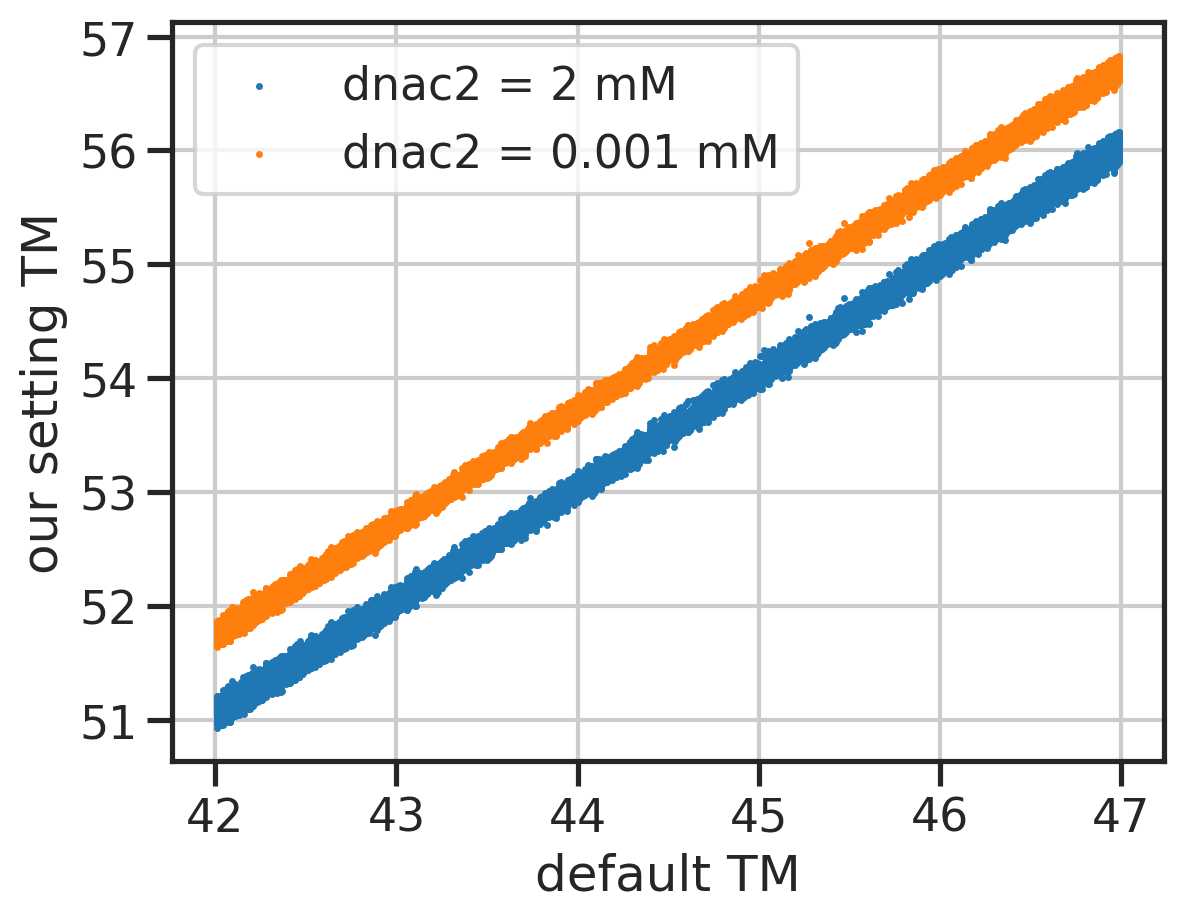

In [27]:
plt.scatter(df4['tm'].values, 
            df4['newtm'].values,
            s=1,
            label="dnac2 = 2 mM",
            ) 

plt.scatter(df4['tm'].values, 
            df4['newtm2'].values,
            s=1,
            label="dnac2 = 0.001 mM",
            ) 
plt.legend()
plt.xlabel("default TM")
plt.ylabel("our setting TM")


In [28]:
import Bio.SeqUtils.MeltingTemp as mt

In [29]:
def recalc_tm(seq, fmd=30, Na=300, dnac1=2, dnac2=2):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    

In [47]:
dfviz = df.iloc[:10000].copy()
dfviz['dfttm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=50, Na=390, dnac1=25, dnac2=25))
# dfviz['newtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x))
dfviz['ourtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, fmd=30, Na=300, dnac1=2, dnac2=0.001))
dfviz['zhuangtm'] = dfviz['seq'].apply(lambda x: recalc_tm(x, Na=300, fmd=0, dnac1=2, dnac2=2)) 
dfviz

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc,dfttm,ourtm,zhuangtm
0,chr1,3214521,3214550,TGACCAAGGACACCGAAAACAGAAAGCGGG,42.59,99.052,0.0,0,0.502,0,+,Xkr4,1,30,0.533333,42.589093,52.361577,71.179513
1,chr1,3214634,3214663,AGCTGATGGAGTGGTAAGCCCTCAAGCAGT,42.83,98.987,0.0,0,0.279,0,+,Xkr4,1,30,0.533333,42.826516,52.513870,71.314019
2,chr1,3214882,3214911,ATTTGGCACTCGAAAGATGTGGCACGTGGT,42.67,100.000,0.0,0,0.192,0,+,Xkr4,1,30,0.500000,42.665785,52.431509,71.248030
3,chr1,3214924,3214953,ACCTGCTGACCCATGTCATTCTGCACCTGG,43.76,100.000,0.0,0,0.277,0,+,Xkr4,1,30,0.566667,43.756240,53.467755,72.272928
4,chr1,3214993,3215022,TAGTCCCTGTTCCTCTCCTGTGGCTCTGTG,42.13,99.877,0.0,0,0.525,0,+,Xkr4,1,30,0.566667,42.133550,51.838190,70.641965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr1,59211347,59211376,TGAGAGACAAGGCCCCAGCTTCATAGGTGG,42.85,99.448,0.0,0,0.294,0,+,Als2,3,30,0.566667,42.851320,52.543807,71.345028
9996,chr1,59211377,59211406,CAGCCACTCTGACACCAACAGCAGATGCAC,42.97,100.000,0.0,0,0.230,0,+,Als2,3,30,0.566667,42.972806,52.772582,71.596212
9997,chr1,59211407,59211436,AGGAGACCACCAAGCTGTTGAGGGCTGAGG,44.64,98.982,0.0,0,0.185,0,+,Als2,3,30,0.600000,44.642915,54.326704,73.126066
9998,chr1,59215115,59215144,GGCTTTTCTCCAGGCTCATGGTTCTCCCTC,42.11,100.000,0.0,0,0.368,0,+,Als2,3,30,0.566667,42.114683,51.845945,70.655281


Text(0, 0.5, 'our setting TM')

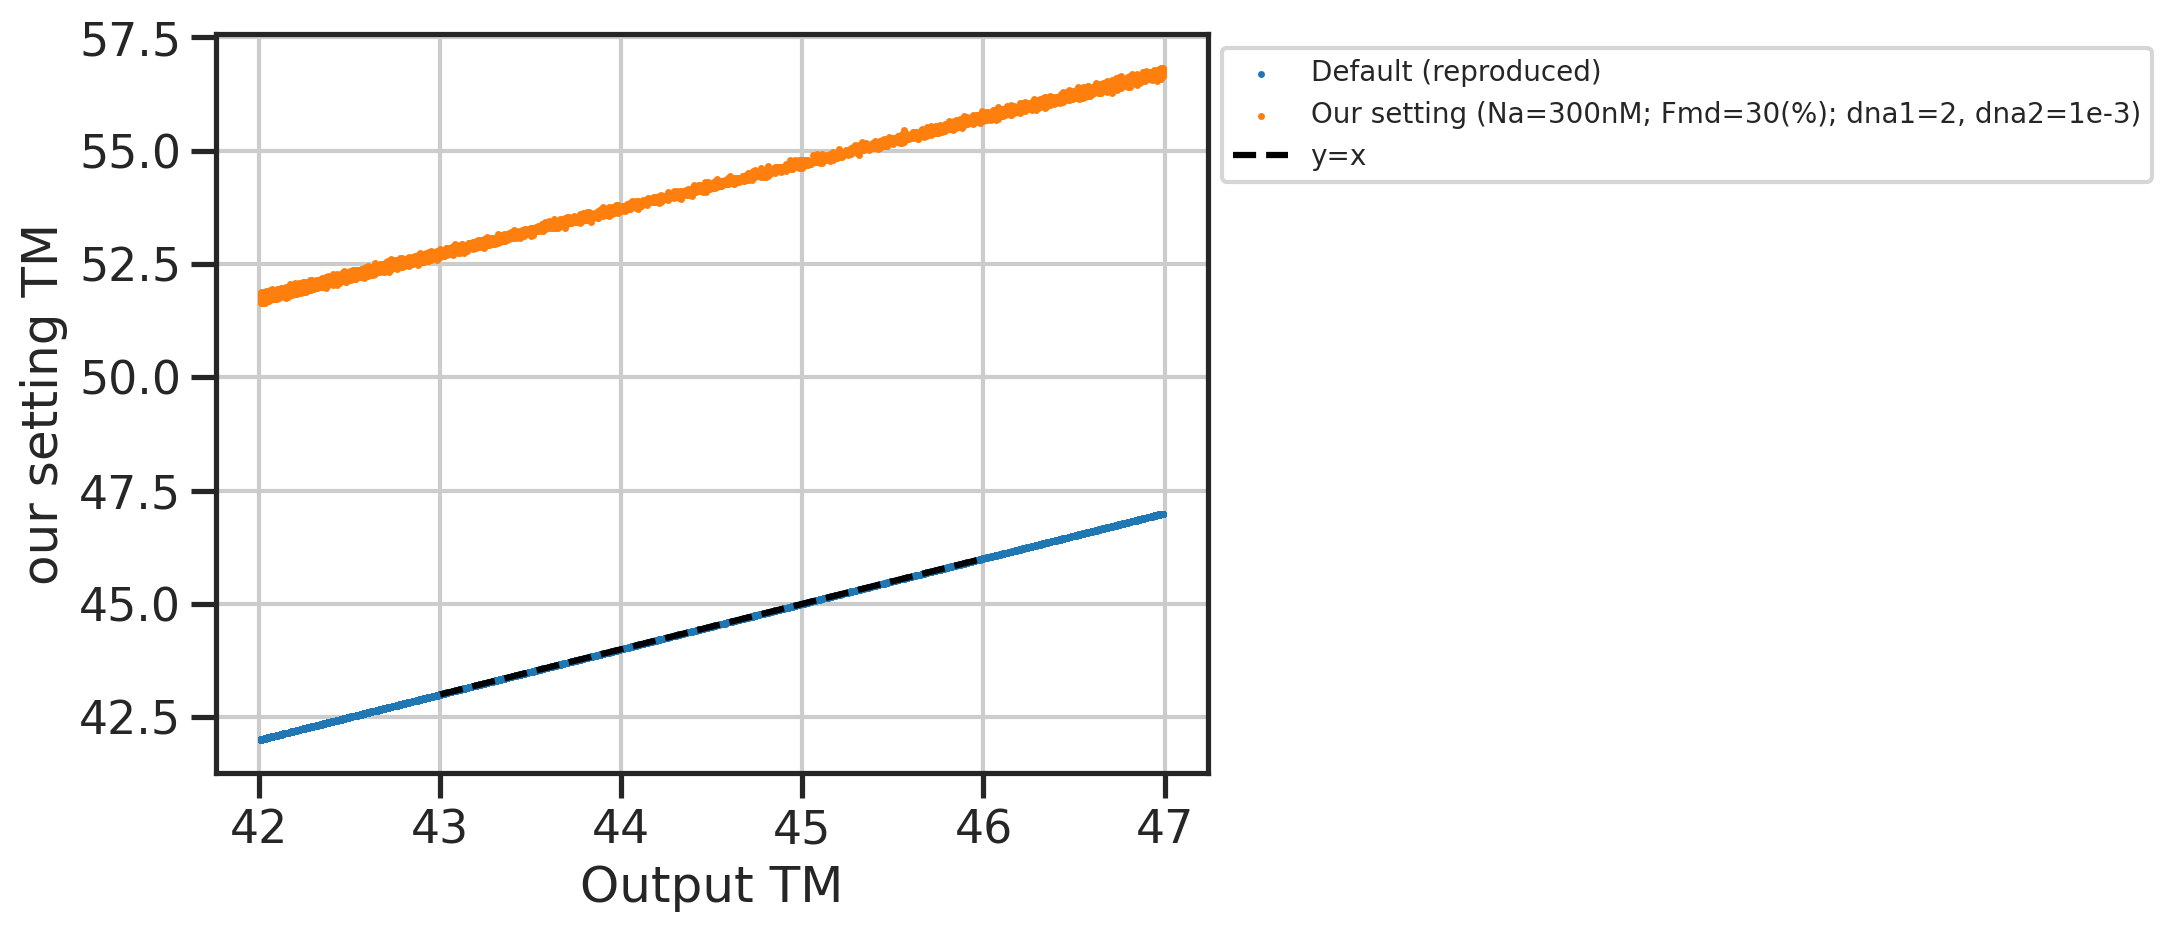

In [50]:
plt.scatter(dfviz['tm'].values, 
            dfviz['dfttm'].values,
            s=1,
            label="Default (reproduced)",
            ) 
plt.scatter(dfviz['tm'].values, 
            dfviz['ourtm'].values,
            s=1,
            label="Our setting (Na=300nM; Fmd=30(%); dna1=2, dna2=1e-3)",
            ) 
# plt.scatter(dfviz['tm'].values, 
#             dfviz['zhuangtm'].values,
#             s=1,
#             label="Zhuang code set?",
#             ) 
plt.plot([43,46], [43,46], '--k', label='y=x')
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.xlabel("Output TM")
plt.ylabel("our setting TM")
